In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import qr
import itertools
from scipy.special import erfc

from Decoder import Decoder


In [2]:
H = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]
])
print("H : \n",H)


n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)


H : 
 [[1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]]


In [3]:
def getBER(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    p = 0.5*erfc(math.sqrt(snr))
    avg = 0
    tg = Decoder(H,"bsc",[p],num_iter)
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        error_array = np.random.binomial(1, p, size=len(c))
        y = (c+error_array)%2
        c_hat = tg.decode(y,1)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N
    

In [4]:
# H = np.array( [[0,0,1,1,0,0,1,0,0,0,0,0,0,0,0]
# ,[1,0,0,0,1,0,0,1,0,0,0,0,0,0,0]
# ,[0,1,0,0,0,1,0,0,1,0,0,0,0,0,0]
# ,[1,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
# ,[0,1,0,1,0,0,0,1,0,0,0,0,0,0,0]
# ,[0,0,1,0,1,0,0,0,1,0,0,0,0,0,0]
# ,[1,0,0,1,0,0,0,0,1,0,0,0,0,0,0]
# ,[0,1,0,0,1,0,1,0,0,0,0,0,0,0,0]
# ,[0,0,1,0,0,1,0,1,0,0,0,0,0,0,0]
# ,[1,0,0,1,0,0,1,0,0,1,0,0,1,0,0]
# ,[0,1,0,0,1,0,0,1,0,0,1,0,0,1,0]
# ,[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1]],dtype=int)
# n = H.shape[1]
# binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
# C = []
# for c in binary_vectors:
#     if np.sum(np.dot(H,c.T)%2)==0:
#         C.append(c)


In [5]:
snrdb_vals = []
bers = []
N = 10000
for snrdb in np.arange(0.5,5.1,0.5):
    snr = math.pow(10,snrdb/20)
    ber = getBER(snr,H,C,1000,N)
    bers.append(ber)
    print("BER : ",ber)
    snrdb_vals.append(snrdb)

BER :  0.07269999999999346
BER :  0.06597777777777222
BER :  0.0610222222222175
BER :  0.055555555555551736
BER :  0.050955555555552444
BER :  0.045222222222219804
BER :  0.041466666666664806
BER :  0.03833333333333191
BER :  0.03416666666666582
BER :  0.029766666666666497


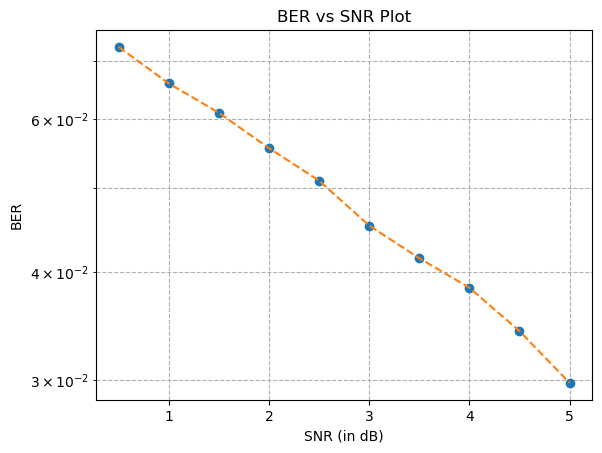

[0.07269999999999346, 0.06597777777777222, 0.0610222222222175, 0.055555555555551736, 0.050955555555552444, 0.045222222222219804, 0.041466666666664806, 0.03833333333333191, 0.03416666666666582, 0.029766666666666497]


In [6]:
import matplotlib.pyplot as plt

plt.plot(snrdb_vals, bers, 'o')  
plt.plot(snrdb_vals, bers, '--')

plt.title("BER vs SNR Plot")
plt.ylabel("BER")
plt.xlabel("SNR (in dB)")

plt.yscale('log')

plt.grid(True, which="both", ls="--")
plt.show()

print(bers)


In [7]:
for i in np.arange(0,22,5):
    for j in range(i,min(i+5,22)):
        print(j,end=" ")
    print()

0 1 2 3 4 
5 6 7 8 9 
10 11 12 13 14 
15 16 17 18 19 
20 21 


In [8]:
num_CN = 25
def initialize_clusters(cluster_size):
    clusters = []
    for i in np.arange(0,num_CN,cluster_size):
        temp = []
        for j in range(i,min(i+cluster_size,num_CN)):
            temp.append(j)
        clusters.append(temp)

    print(clusters)

initialize_clusters(5)

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24]]
